# Исследование рынка заведений общественного питания Москвы

- Автор: Прудникова Диана
- Дата: 02.04.2025 

### Цели и задачи проекта

**Цель**: провести исследовательский анализ данных заведений общесвенного питания города Москвы, с выявлением подходящего места для открытия заведения.

**Задачи**:

1. Загрузить данные и познакомиться ними.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
  - подробно исследовать данные в разрезе категорий общественного питания;
  - изучить взаимосвязь данных рейтинга заведений с другими данными;
  - изучить вариацию среднего чека заведения в зависимости от района Москвы.
4. Сформулировать итоговый вывод и дать рекомендации на основе проведенного анализа.</font>

### Содержимое проекта
1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

## 1. Загрузка данных и знакомство с ними
Загрузим данные из датасетов `rest_info.csv` и `rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

!pip install phik
from phik import phik_matrix

Выведем первые строки и общую информацию о датафрейме `rest_info.csv`. 

In [3]:
# Выводим первые строки датафрейма
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


**Вывод**: Датасет `rest_info.csv` состоит из 9 столбцов и 8406 строк, которые содержат информацию о заведениях общественного питания.

Названия столбцов можно оставить, так как они представлены в корректном стиле.

Данные в столбцах id, name, category, address, district, hours хранятся в типах данных `object`, что логично, так как данные содержат текст. Значения в столбцах rating, chain, seats содержат числовые значения и хранятся в типах данных `int64` или `float64` — размерность этих данных можно оптимизировать.

Пропуски содержатся в двух столбцах - hours и seats. Однако следует проверить значения-индикаторы и в других полях. По первому знакомству с данными, значения в столбцах соответствуют своему описанию. Также, можно отметить что в датафрейме присутствует поле с id заведений, что говорит о том, что данные в каждой строке должны быть уникальными.

Познакомимся с данными датафрейма rest_price.csv.  

In [5]:
# Выводим первые строки датафрейма
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


**Вывод**: Датасет `rest_price.csv` состоит из 5 столбцов и 4058 строк, которые содержат информацию о среднем чеке в заведениях общественного питания.

Названия столбцов можно оставить, так как они представлены в корректном стиле.

Данные в столбцах id, price, avg_bill хранятся в типах данных `object`, что логично, так как данные содержат текст. Значения в столбцах middle_avg_bill и middle_coffee_cup  содержат числовые значения и хранятся в типе данных `float64` — размерность этих данных можно оптимизировать.

Пропуски содержатся во всех столбцах, кроме данных с информацией id чека. По первому знакомству с данными, значения в столбцах соответствуют своему описанию. Также, можно отметить что в датафрейме присутствует поле с id чеков, что говорит о том, что данные в каждой строке должны быть уникальными.

---

### Промежуточный вывод. 

Первичное знакомство показывает, что в целом данные среднего качества и для дальнейшего анализа требуется провести тщательную предобработку. Сами данные соответствуют описанию, но присутствует существенное колиество пропусков. Также можно отметить, что используются верные типы данных, но можно оптимизировать размерность числовых значений. В каждом датафрейме присутствует информация с id, из этого можно сделать вывод что каждая строка является уникальной.  

### Подготовка единого датафрейма
Объединим данные двух датасетов в один, с которым и продолжим работу. Будем объединять по полю id с типом присоединения left, чтобы сохранить все данные из датасета с информацией о ресторанах. 

In [7]:
# Объединяем датасеты по полю id
df = info_df.merge(price_df, on='id', how='left')

Проверяем количество строк датафрейма после объединения.

In [8]:
# Выводим информацию о объединенном датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Все строки сохранены.

In [9]:
# Создаем переменную для сохранения исходного количества строк датафрейма
df_lines = df.shape[0]

## 2. Предобработка данных
Оптимизируем типы данных в столбцах `rating`, `chain`, `seats`, `middle_avg_bill` и `middle_coffee_cup`. 

In [10]:
# Оптимизируем тип данных с плавающей точкой
for column in ['rating','seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column], downcast='float')
    
# Оптимизируем целочисленный тип данных 
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

Проверим типы данных после оптимизации.

In [11]:
# Проверим типы данных с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

Типы данных были успешно оптимизированы с понижением размерности числовых данных.

**Проверяем наличие пропусков в данных**.

При первичном анализе мы обнаружили пропуски в столбцах: hours, seats, price, avg_bill, middle_avg_bill, middle_coffee_cup. Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [12]:
# Применяем метод isna()
df.isnull().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [13]:
# Подсчитываем долю строк с пропусками
round((df.isnull().sum() / df.shape[0]),2).sort_values(ascending=False)

middle_coffee_cup    0.94
middle_avg_bill      0.63
price                0.61
avg_bill             0.55
seats                0.43
hours                0.06
id                   0.00
name                 0.00
category             0.00
address              0.00
district             0.00
rating               0.00
chain                0.00
dtype: float64

In [14]:
# Применяем метод isna() к датафрейму price_df 
price_df.isnull().sum().sort_values(ascending=False)

middle_coffee_cup    3523
middle_avg_bill       909
price                 743
avg_bill              242
id                      0
dtype: int64

In [15]:
# Подсчитываем долю строк с пропусками в датафрейме price_df 
round((price_df.isnull().sum() / price_df.shape[0]),2).sort_values(ascending=False)

middle_coffee_cup    0.87
middle_avg_bill      0.22
price                0.18
avg_bill             0.06
id                   0.00
dtype: float64

**Вывод по пропускам**. Обнаружено 536 пропусков в столбце `hours` — это 6% данных. Пропуски в этом столбце могут быть вызваны например тем, что пользователи при внесении данных не добавили информацию о режиме работы заведения. Заменим пропуски на значение-индикатор "Нет информации". В поле `seats` выявлено 3611 пропусков - это 43% данных. Количество пропусков достаточно большое, чтобы их удалить. В данном случае пропуски также могут быть связаны с тем, что при внесении данных у пользователей не было данной информации или сотрудник, который должен прописывать информацию, может этого не делать. Пропуски в этом случае оставим без изменений.   

В столбцах `price, avg_bill, middle_avg_bill и middle_coffee_cup` наблюдается большое количество пропусков и нужно учесть, что часть из них образовалась в следствии объединения датафреймов, т.к. датасет содержащий эти поля был меньше. Для более четкого понимания пропусков в данных столбцах, были посчитаны пропуски в первоначальном датасете price_df. 

Пропуски в полях `price` (содержит 743 пропуска - 18%) и `avg_bill` (содержит 242 пропуска - 6%), могут быть связаны с отсутствием информации при внесении, т. к. датасеты составлены на основе данных добавленных пользователями или найденными в общедоступных источниках. Их также можно заменить на значение-индикатор "Нет информации".

Столбец `middle_avg_bill` (содержит 909 пропусков - 22%), хранит число с оценкой среднего чека, которое указано только для значений из столбца avg_bill начинающихся с подстроки «Средний счёт», а столбец `middle_coffee_cup` (содержит 3523 пропусков - 87%), хранит число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино». В связи с этим можно сделать вывод, что в данном случае, пропуски связаны со столбцом `avg_bill`. В этой ситуации, пропуски можно оставить.

**Далее проверим, встречаются ли в данных значения-индикаторы, которые можно рассматривать как пропуски**. Посмотрим на уникальные значения в ключевых данных и в столбцах с пропусками: `'district', 'category', 'hours', 'rating', 'chain', 'price','middle_avg_bill','seats', 'avg_bill','middle_coffee_cup'`.  

In [16]:
# Импортируем библиотеку numpy и настраиваем параметры печати массивов
import numpy as np

np.set_printoptions(suppress=True, precision=3)

# Проверяем уникальные значения в столбцах
for column in ['district', 'category', 'hours', 'rating', 'chain', 'price',
               'middle_avg_bill','seats', 'avg_bill','middle_coffee_cup']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()
    

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00' nan]

Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. 

После проверки уникальных значений, можно сделать вывод, что в некоторых столбцах присутствуют значения-индикаторы, а именно: 
 - `hours` - 'Нет информации';
 - `middle_avg_bill` - 0;
 -  `seats` - 0.
  
  Посчитаем количетсво таких значений.

In [17]:
# Проверяем сколько раз встречается значение-индикатор в столбце hours - 'нет информации' 
(df['hours']=='Нет информации').sum()

1

In [18]:
# Проверяем сколько раз встречается значение-индикатор - 0
for column in ['middle_avg_bill','seats']:
    print(f'Количество значений-индикаторов в столбце {column}:')
    print((df[column]==0).sum())
    print()

Количество значений-индикаторов в столбце middle_avg_bill:
1

Количество значений-индикаторов в столбце seats:
136



Выявлено по одному значению-индикатору в столбцах 'hours' и 'middle_avg_bill', а в поле 'seats' таких значений - 136. В целом, количество не критично, используем значение-индикатор "Нет информации" для замены остальных пропусков в столбце `hours`.

**Заполняем пропуски в данных на значение-индикатор**.

In [19]:
# Заменяем пропуски в столбцах 'hours', 'price', 'avg_bill' на значение-индикатор "Нет информации" 
df[['hours', 'price', 'avg_bill']] = df[['hours', 'price', 'avg_bill']].fillna(value='Нет информации')

**Явные и неявные дубликаты в данных**.

Проверим наличие полных дубликатов:

In [20]:
# Проверяем полные дубликаты
df.duplicated().sum()

0

Полных дубликатов строк не выявлено. Проверим наличие неявных дубликатов - значения id заведений должны быть уникальными:

In [21]:
# Проверяем неявные дубликаты
df.duplicated(subset='id').sum()

0

Все строки уникальны. 

Проверим корректность написания категориальных значений в данных. Для этого, нормализуем данные в столбце с названием и адресом заведения.


In [22]:
# Количество уникальных значений в категориальных данных с названием и адресом заведения
unique_count = df[['name','address']].nunique()
display(unique_count)

name       5614
address    5753
dtype: int64

In [23]:
# Приводим к нижнему регистру и удаляем лишние пробелы в начале и в конце строки
# в данных с названием и адресом заведения
df['name'] = df['name'].str.lower().str.strip()
df['address'] = df['address'].str.lower().str.strip()

In [24]:
# Количество уникальных значений в категориальных данных с названием и адресом 
# заведения после нормализации
unique_count_after = df[['name','address']].nunique()
display(unique_count_after)

name       5512
address    5752
dtype: int64

После нормализации данных, в столбце `address` количество уникальных значений уменьшилось на 1, а в столбце `name` уменьшилось на 102. Проверим наличие дублирующих значений в паре `name-address`. 

In [25]:
# Дублирующие значения в паре name-address
df.duplicated(subset=['name','address']).sum()

4

Изучим дублирующиеся строки.

In [26]:
# Выводим дублирующиеся строка в паре 'name'-'address' 
df[df.duplicated(subset=['name','address'],keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,Нет информации,Нет информации,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,Нет информации,Нет информации,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,Нет информации,Нет информации,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,Нет информации,Нет информации,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,Нет информации,Нет информации,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,Нет информации,Нет информации,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,Нет информации,Нет информации,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,Нет информации,4.1,0,276.0,Нет информации,Нет информации,NaN,NaN


Можно сделать вывод, что выявленные дубликаты в паре `name-addre` являются неявными. Есть несовпадения по некоторым полям:
режим работы, категория и показатель является ли заведение сетевым - это может быть связано с неполной или ошибочной информацией при внесении данных и стилем написания режима работы. Исходя из этого удалим данные дубликаты.

In [27]:
# Удаляем дубликаты
df.drop_duplicates(subset=['name','address'], keep='first', inplace = True)

**Создаем стобец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7**:
 - логическое значение True — если заведение работает ежедневно и круглосуточно;
 - логическое значение False — в противоположном случае.
 
 Проверим, есть ли в столбце 'hours' значение 24/7 

In [28]:
# Проверяем есть ли в столбце hours значение 24/7
if '24/7' in df['hours'].values:
    print('Элемент найден!')

Данных значений не найдено. Перед проверкой условия режима работы 'ежедневно и круглосуточно' нормализуем данные в столбце `hours` - приведем значения к нижнему регистру и удалим пробелы в начале и в конце строки. 

In [29]:
# Приводим к нижнему регистру и удаляем лишние пробелы в начале и в конце строки 
# в столбце с режимомом работы заведения
df['hours'] = df['hours'].str.lower().str.strip()

In [30]:
# Создаем новый столбец is_24_7 с булевыми значениями в зависимости от того работает 
# заведение 24/7 или нет
df['is_24_7']= df['hours'].map(lambda x: True if 'ежедневно, круглосуточно' in str(x) else False)

После создания нового столбца, проверим его корректность, выведем на экран первые пять строк датафрейма. 

In [31]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,Нет информации,Нет информации,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,Нет информации,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


Новый столбец с обозначением того, что заведение работает ежедневно и круглосуточно, создан корректно.

**В заключении предобработки данных посчитаем количество удаленных строк датафрейма**.

In [32]:
# Подсчитываем количество удалённых строк
deleted_lines = df_lines - df.shape[0]
# Выводим процент удалённых строк
deleted_percent = round(deleted_lines / df_lines * 100, 2)
print(f'Удалено всего {deleted_percent}% или {deleted_lines} строки.')

Удалено всего 0.05% или 4 строки.


---

### Промежуточный вывод после предобработки


В процессе предобработки данных были выполнены следующие действия:
- Для дальнейшего анализа данных объединены два датасета: с информацией о заведениях и среднем чеке, с полным сохранением всех строк датафрейма с данными о заведениях.
- Оптимизирована размерность числовых данных в столбцах `rating, chain, seats, middle_avg_bill и middle_coffee_cup`.
- Изучены пропущенные значения в данных - их количество достаточно велико. Пропуски имеются в 6 столбцах из 13: `hours`(6%), `seats`(43%), `price`(18% в первоначальном датасете), `avg_bill`(6% первоначальном датасете), `middle_avg_bill` (22% первоначальном датасете), `middle_coffee_cup` (87% первоначальном датасете). 

В полях `middle_avg_bill` и `middle_coffee_cup` содержание пропусков можно объяснить тем, что в них хранится информация, которая зависит от данных в столбце `avg_bill` - число с оценкой среднего чека, которое указано только для значений начинающихся с подстроки «Средний счёт» и число с оценкой одной чашки капучино, которое указано только для значений, начинающихся с подстроки «Цена одной чашки капучино», из столбца avg_bill. Пропуски в этих полях оставили без изменений.

Порпуски в остальных стобцах могут быть по следующим причинам: при внесении данных у пользователей не было данной информации  или сотрудник, который должен прописывать информацию, сделал это не в полной мере. Количество пропусков достаточно большое, чтобы их удалить. В данном случае их заменили на значение-индикатор 'Нет информации', для столбцов `price, avg_bill, hours`, а в поле `seats` оставили без изменений.  
- Данные проверены на наличие явных и неявных дубликатов. Полных дубликатов не обнаружено. Однако выявлены и изучены неявные дубликаты после нормальизации данных.
- В результет обработки дубликатов удалено 4 строки (0.05%).
- Для дальнейшего анализа создан новый столбец `is_24_7`, с обозначением того, что заведение работает ежедневно и круглосуточно, логическое значение True — если заведение работает ежедневно и круглосуточно и логическое значение False — в противоположном случае. 

## 3. Исследовательский анализ данных

---

### Количество объектов общественного питания по каждой категории заведения.

Исследуем количество объектов общественного питания в каждой категории общепита.

In [33]:
# Группируем данные по столбцу 'category' 
grouped_category = df.groupby('category',as_index=False)
# Считаем количество заведений по каждой категории
data_category = grouped_category['category'].agg({'id':'count'}).sort_values(by='id', 
                                                                             ascending=False)
display(data_category)

,category,id
3,кафе,2376
6,ресторан,2042
4,кофейня,1413
0,"бар,паб",764
5,пиццерия,633
2,быстрое питание,603
7,столовая,315
1,булочная,256


Визуализируем количество объектов общепита по каждой категории на диаграмме.

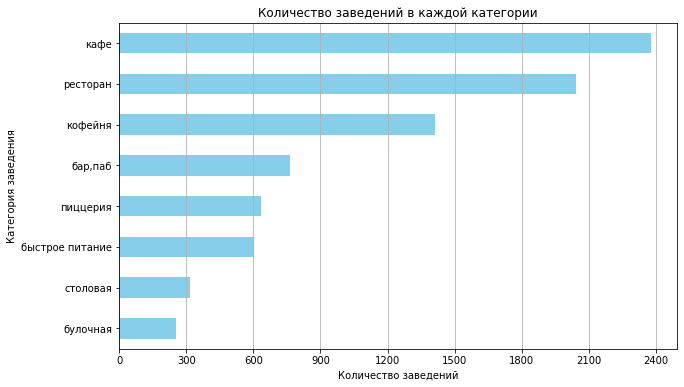

In [34]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим линейчатую диаграмму
df['category'].value_counts().sort_values(ascending=True).plot(kind='barh',
                                color='skyblue',
                                legend=False)

# Настраиваем график с помощью библиотеки matplotlib
plt.title('Количество заведений в каждой категории')
plt.xlabel('Количество заведений')
plt.ylabel('Категория заведения')
plt.xticks(rotation=0)
plt.grid(b=True, axis='x') 
plt.xticks(np.arange(0,2500,300))

# Выводим график
plt.show()

Из категорий по количеству заведений преобладают кафе - 2376, и рестораны - 2042. Наименьшее число объектов относятся к категории столовая (315) и булочная (256). 

---

### Распределение количества заведений по административным районам Москвы.

Изучим распределение заведений по административным районам Москвы.

In [35]:
# Группируем данные по столбцу 'district' 
grouped_district = df.groupby('district',as_index=False)
# Считаем количество заведений в каждом районе
data_district = grouped_district['district'].agg({'id':'count'}).sort_values(by='id', 
                                                                             ascending=False)
display(data_district)

,district,id
5,Центральный административный округ,2242
2,Северный административный округ,898
8,Южный административный округ,892
3,Северо-Восточный административный округ,890
1,Западный административный округ,850
0,Восточный административный округ,798
6,Юго-Восточный административный округ,714
7,Юго-Западный административный округ,709
4,Северо-Западный административный округ,409


Визуализируем распределение заведений по административным районам Москвы.

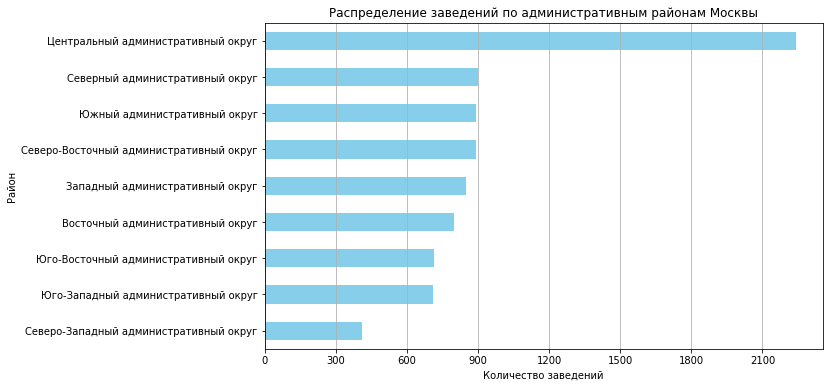

In [36]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим линейчатую диаграмму
df['district'].value_counts().sort_values(ascending=True).plot(kind='barh',
                                color='skyblue',
                                legend=False)

# Настраиваем график с помощью библиотеки matplotlib
plt.title('Распределение заведений по административным районам Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Район')
plt.yticks(rotation=0)
plt.grid(b=True, axis='x')
plt.xticks(np.arange(0,2400,300))

# Выводим график
plt.show()

Можно заметить, что количество заведений заметно преобладает в центральном административном округе - 2242, на втором месте Северный административный округ - 898. Это неудивительно, ведь  центр Москвы является средоточием общественной и деловой жизни столицы, что делает его привлекательным местом для заведений общепита.

**В связи с этим рассмотрим распределение заведений каждой категории в Центральном административном округе Москвы**. 

In [37]:
# Фильтруем столбец district 
filtered_df = df[df['district'] =='Центральный административный округ']

Считаем количество заведений каждой категории в центральном административном округе.

In [38]:
# Группируем данные по столбцу 'category' 
grouped_centre = filtered_df.groupby('category',as_index=False)
# Считаем количество заведений по каждой категории в центре
data_centre = grouped_centre['category'].agg({'id':'count'}).sort_values(by='id', 
                                                                             ascending=False)
display(data_centre)

,category,id
6,ресторан,670
3,кафе,464
4,кофейня,428
0,"бар,паб",364
5,пиццерия,113
2,быстрое питание,87
7,столовая,66
1,булочная,50


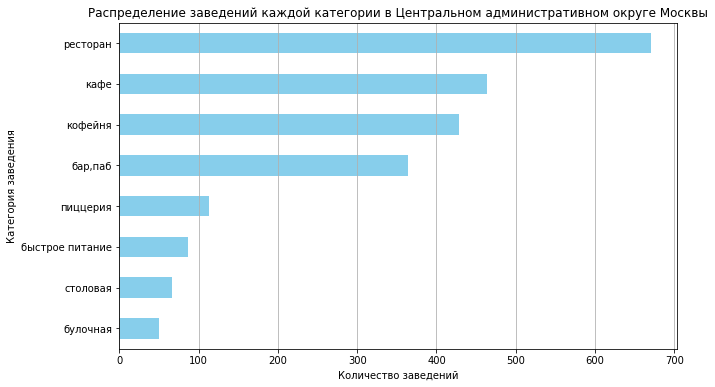

In [39]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим линейчатую диаграмму
filtered_df['category'].value_counts().sort_values(ascending=True).plot(kind='barh',
                                color='skyblue',
                                legend=False)

# Настраиваем график с помощью библиотеки matplotlib
plt.title('Распределение заведений каждой категории в Центральном административном округе Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Категория заведения')
plt.yticks(rotation=0)
plt.grid(b=True, axis='x')

# Выводим график
plt.show()

В Центральном административном округе Москвы наиболее популярной категорией общепита является ресторан - 670 заведений. Можно отметить, что в отличии от центра, в целом по городу преобладают кафе, в остальном тенденция приблизительно совпадает.

---

### Соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

 - Изучим распределение заведений по сетевым и несетевым и узнаем каких заведений больше. 
 - Исследуем какие категории заведений чаще являются сетевыми. 

Посчитаем количество сетевых и несетевых общепитов.

In [40]:
# Группируем данные по столбцу 'chain' 
grouped_chain = df.groupby('chain',as_index=False)
# Считаем количество заведений по каждой категории в центре
data_chain = grouped_chain['chain'].agg({'id':'count'}).sort_values(by='id', 
                                                        ascending=False)
display(data_chain)

,chain,id
0,0,5199
1,1,3203


Визуализируем соотношение сетевых и несетевых заведений.

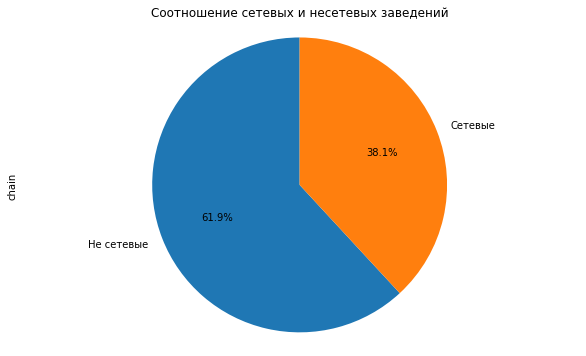

In [41]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

labels = ['Не сетевые', 'Сетевые']

# Строим круговую диаграмму 
df['chain'].value_counts(normalize=True).plot( kind='pie',
                            autopct='%1.1f%%', labels=labels, startangle=90) 

# Настраиваем оформление диаграммы
plt.axis('equal')
plt.title('Соотношение сетевых и несетевых заведений')

# Выводим диаграмму
plt.show()

Видно, что доля несетевых заведений заметно преобладает - 62%, соответственно несетвые заведения составляют 38%.

Считаем количество сетевых и несетевых заведений по категориям.

In [42]:
# Группируем данные по столбцам 'category' и'chain' и считаем количество
# сетевых и несетевых заведений в каждой категории
df.groupby(['category','chain'], as_index=False).agg({'id':
                                    'count'}).sort_values(by='id', ascending=False)                                    

,category,chain,id
6,кафе,0,1597
12,ресторан,0,1313
7,кафе,1,779
13,ресторан,1,729
9,кофейня,1,720
8,кофейня,0,693
0,"бар,паб",0,596
4,быстрое питание,0,371
11,пиццерия,1,330
10,пиццерия,0,303


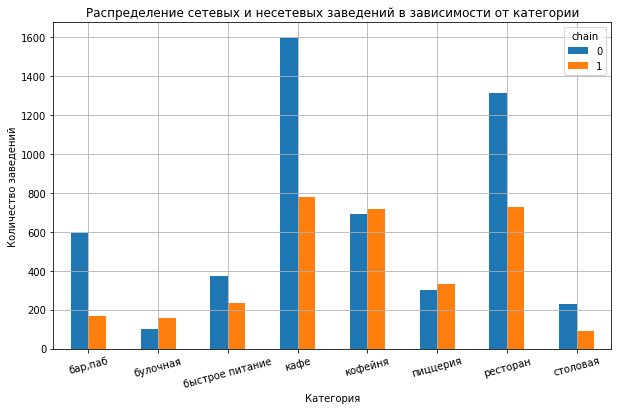

In [43]:
# Строим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar',
               legend=True,
               figsize=(10, 6))

# Настраиваем оформление графика
plt.title('Распределение сетевых и несетевых заведений в зависимости от категории')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=15)
plt.grid()

# Выводим график
plt.show()

Можно заметить, что сетевые заведения преобладают над несетевыми в следующих категориях общепита: `булочная` (сетевые 157, несетевые 99), `кофейня` (сетевые 720, несетевые 693), `пиццерия` (сетевые 330, несетевые 303). В остальных категориях наблюдается существенное превосходство по количеству несетевых заведений, например в самой популярной категории `кафе` разница достаточно значительна - сетевых 779 и несетевых 1597 объектов. 

---

### Количество посадочных мест в заведениях.

Исследуем количество посадочных мест в заведениях. В связи с тем, что в поле `seats` пропущенные значения составляют 43%, отфильтруем пропуски со значением 0 для более корректного анализа.   

In [44]:
# Фильтруем пропущенные значения 0 в столбеце seats 
filtered_seats = df[df['seats'] >0]

Выведем топ-10 наиболее часто встречающееся количество посадочных мест в заведениях.

In [45]:
# Группируем данные по столбцу 'seats' и считаем частоту распределения количества мест 
filtered_seats.groupby('seats', as_index=False).agg({'id':
                'count'}).sort_values(by='id', ascending=False).head(10)

,seats,id
36,40.0,253
90,100.0,213
54,60.0,175
46,50.0,168
72,80.0,160
104,120.0,141
27,30.0,128
41,45.0,127
64,70.0,126
125,150.0,122


Построим гистограмму и диаграмму размаха распределения количества посадочных мест заведений.  

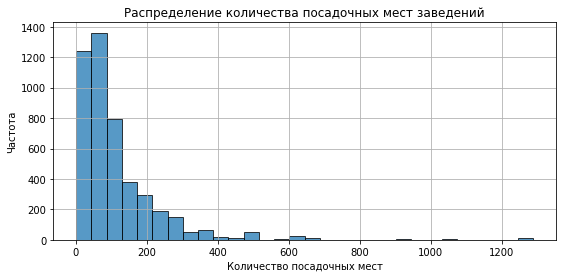

In [46]:
# Строим гистограмму 
filtered_seats['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=30, # Устанавливаем количество корзин
                alpha=0.75,# Устанавливаем частичную прозрачность
                edgecolor= 'black', # Устанавливаем цвет границ ячеек гистограммы
                figsize=(9, 4))

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.grid()

# Выводим график
plt.show()

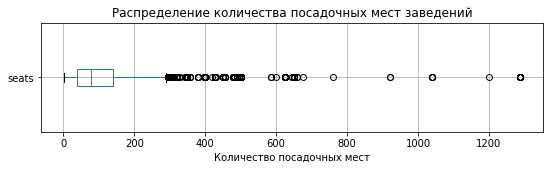

In [47]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(9, 2))

# Строим диаграмму размаха значений в столбце 'seats' 
filtered_seats.boxplot(column= 'seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест заведений')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

Распределение значений количества посадочных мест асимметричное, сильно скошенное влево. Минимальное число мест для гостей заведения — 1, что можно считать корректным, а максимальное является аномальным — 1288. Среднее значение посадочных мест 111, а медиана 78, что говорит о выбросах в большую сторону, это также можно увидеть по диаграмме размаха  — значения выше 350 посадочный мест можно считать выбросами. Однако при анализе данных лучше оставить данные значения, так как в редких случаях заведения могут разместить и большее количество гостей, например при фуршете, и следовательно не все данные с высокими числовыми значениями можно считать аномальными.

Самое популярное количество посадочный мест - 40 (253 заведения), далее 100 мест (213 заведений) и 60 (165 заведений).

Теперь изучим какое число посадочных мест является наиболее типичным для каждой категории. Прежде всего получим краткое статистическое описание столбца `seats` по каждой категории.

In [48]:
# Группируем данные по категориям и расчитываем min и max значение, а также медиану и среднее 
# значение количества посадочных мест
display (filtered_seats.groupby('category')['seats'].agg(['min','max','median','mean']))

,min,max,median,mean
category,,,,
"бар,паб",6.0,1288.0,84.0,125.552917
булочная,3.0,625.0,52.0,96.562042
быстрое питание,1.0,1040.0,75.0,104.268883
кафе,1.0,1288.0,60.0,101.017906
кофейня,2.0,1288.0,80.0,114.870705
пиццерия,1.0,1288.0,56.0,96.762589
ресторан,2.0,1288.0,90.0,123.843872
столовая,4.0,1200.0,80.0,102.886795


Найдём наиболее типичное количество мест для каждой категории.

In [49]:
# Группируем данные по столбцу 'seats' и считаем частоту распределения количества мест 
filtered_seats.groupby('category')['seats'].agg(pd.Series.mode).to_frame()    

,seats
category,
"бар,паб",60.0
булочная,"[48.0, 50.0]"
быстрое питание,40.0
кафе,40.0
кофейня,100.0
пиццерия,40.0
ресторан,100.0
столовая,40.0


Построим график распределения количества посадочных мест в зависимости от категории заведений с помощью KDE.

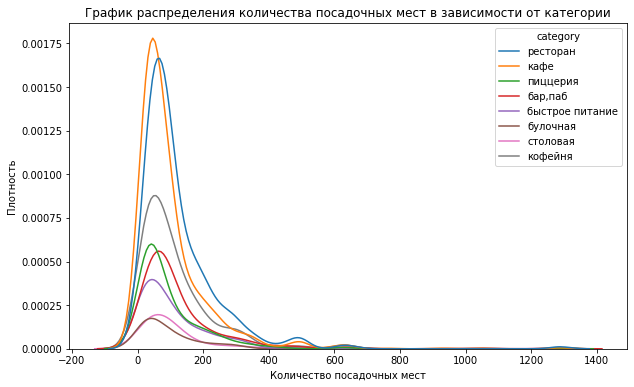

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим гистограммы для каждой категории
sns.kdeplot(data=filtered_seats, x='seats', hue='category') 

# Настраиваем внешний вид графика и выводим его на экран
plt.title('График распределения количества посадочных мест в зависимости от категории')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Плотность')
plt.show()

По графику видно, что в целом наиболее типичное количеством посадочных мест по всем категориям не превышает 100. Максимальное типичное число мест для гостей общепита наблюдается в категории ресторан и кофейня - 100, для типа заведений кафе, пиццерия, быстрое питание и столовая - 40 мест и немного выше по категориям бар-паб - 60 и булочная - 50 мест.

По всем видам заведений характерны выбросы в большую сторону. Это видно по тому, что медиана количества мест по всем категориям существенно ниже среднего значения. Максимальное значение мест большинства категорий одинаково - 1288, это может говорить о том, что возможно это значение использовали как индикатор пропуска при заполнении данных. Однако такие значения в данных встречаются довольно редко и все же есть вероятность существования общепитов с очень высоким числом посадочных мест. В связи с этим фильтровать данные значения в датасете не будем.     



---

### Рейтинг заведений.

Визуализируем распределение средних рейтингов по категориям заведений общественного питания. 

Посчитаем средний рейтинг для каждой категории общепита.

In [51]:
round ((df.groupby('category', as_index=False)['rating'].mean()),2).sort_values(by='rating', 
                                                    ascending=False) 

,category,rating
0,"бар,паб",4.39
5,пиццерия,4.30
6,ресторан,4.29
4,кофейня,4.28
1,булочная,4.27
7,столовая,4.21
3,кафе,4.12
2,быстрое питание,4.05


Визуализируем усредненные рейтинги на диаграмме.

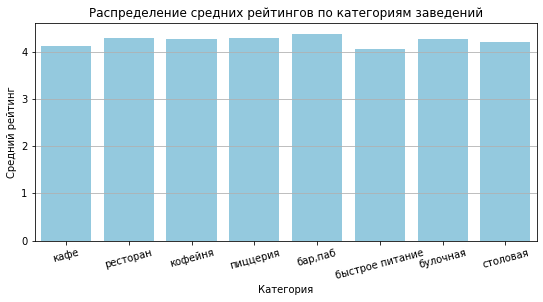

In [52]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(9, 4))

df.groupby('category', as_index=False)['rating'].mean()

# Строим столбчатую диаграмму распределения средних рейтингов по категориям
sns.barplot( x='category', y='rating', data=df, color='skyblue', ci=False)
     
# Настраиваем внешний вид диаграммы и выводим на экран
plt.title('Распределение средних рейтингов по категориям заведений')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=15)
plt.grid(b=True, axis='y')
plt.show()        

По диаграмме видно, что средний рейтинг для всех типов общепита не сильно отличается - не менее 4. Максимальный усредненный рейтинг наблюдается в категории `бар-паб` (4.39), минимальный `быстрое питание` (4.05).

---

### Взаимосвязь данных в столбце `rating`с другими признаками.

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений.

In [53]:
# Преобразуем целочисленные тип данных столбца 'chain' в категориальный   
df['chain'] = df['chain'].astype('category')

In [54]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['district', 'category', 'chain', 'seats', 'price',
                         'is_24_7','rating']].phik_matrix()

# Выводим результат
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['seats', 'rating']


,rating
price,0.310473
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


Наибольшая корреляция значения рейтинга наблюдается с ценовой категорией (0.31), для остальных признаков коэффициент корреляции снижается с 0.20 до 0. Можно предположить, что чем выше ценовая категория, тем выше рейтинг - в этом случае будет наблюдаться положительная зависимость между этими переменными. Проверим данную гипотезу.

Визуализируем результат корреляции с помощью тепловой карты:

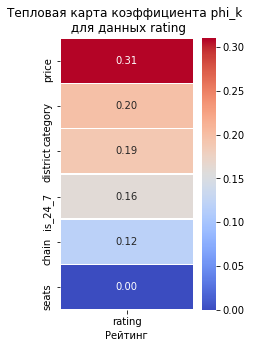

In [55]:
# Строим тепловую карту и задаем ее размер
plt.figure(figsize=(3, 5))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(
                                                                        by='rating', ascending=False)
                                                                                    
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму
            linewidths=0.5), # Форматируем линию между ячейками карты
# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')
plt.show()

Изучим, существует ли зависимость между рейтингом заведения и ценовой категорией. Для этого посчитаем среднее значение
рейтинга для каждой ценовой категории.

In [56]:
# Группируем данные по ценовой категории и считаем средний рейтинг
round ((df.groupby('price', as_index=False)['rating'].mean()),2).sort_values(by='rating', 
                                                    ascending=False) 

,price,rating
1,высокие,4.44
2,выше среднего,4.39
4,средние,4.30
0,Нет информации,4.17
3,низкие,4.17


Визуализируем средний рейтинг по ценовым категориям.

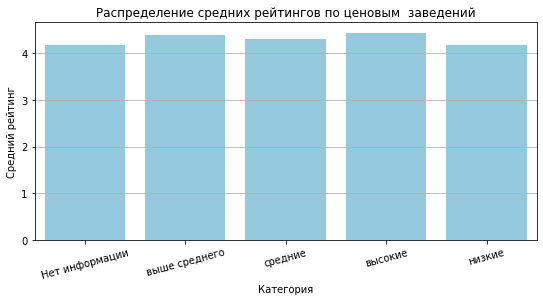

In [57]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(9, 4))

df.groupby('price', as_index=False)['rating'].mean().sort_values(by='rating', 
                                                    ascending=False)

# Строим столбчатую диаграмму распределения средних рейтингов по ценовым категориям
sns.barplot( x='price', y='rating', data=df, ci=False,color='skyblue')
     
# Настраиваем внешний вид диаграммы и выводим на экран
plt.title('Распределение средних рейтингов по ценовым  заведений')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=15)
plt.grid(b=True, axis='y')
plt.show()        


Можно сделать вывод, что присутствует положительная зависимоть между рейтингом и ценовой категорией заведениян - самый высокий средний рейтинг у общепитов с высокой ценовой категорией (4.44), чуть ниже наблюдается рейтинг у ценовая группы выше среднего (4.39), далее рейтинг со средними ценами и низкими немного снижается.   

---

### Топ-15 популярных сетей в Москве. 

Сгруппируем данные по количеству заведений в сети и выведем топ-15 популярных сетей общепита, также посчитаем значение среднего рейтинга для каждой сети.

In [58]:
# Фильтруем данные по столбцу chain, оставляем только сетевые
filtered_chain_df = df[df['chain'] == 1]
# Группируем по названию и категории общепита и выделяем топ-15 сетей
grouped = filtered_chain_df.groupby(['name'],as_index=False).agg({'chain':'count',
                                            'rating':'mean'}).sort_values(by='chain',
ascending=False).head(15)
display (grouped)

,name,chain,rating
729,шоколадница,120,4.177500
335,домино'с пицца,76,4.169737
331,додо пицца,74,4.286487
146,one price coffee,71,4.064789
742,яндекс лавка,69,3.872464
58,cofix,65,4.075385
168,prime,50,4.116000
664,хинкальная,44,4.322727
409,кофепорт,42,4.147619
418,кулинарная лавка братьев караваевых,39,4.394872


Визуализируем на линейчатой диаграмме топ-15 популярных сетей в Москве.

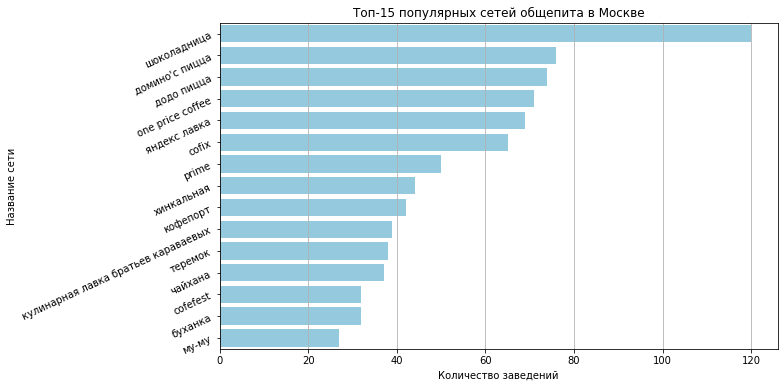

In [59]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим линейчатую диаграмму 
sns.barplot( x= 'chain', y= 'name', data=grouped, ci=False, color='skyblue')

# Настраиваем внешний вид диаграммы и выводим на экран
plt.title('Топ-15 популярных сетей общепита в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.yticks(rotation=25)
plt.grid(b=True, axis='x')
plt.show()        

С достаточно большим отрывом по количестсву заведений в сети лидирует "шоколаница", которая относится к категории кофейня (120 заведений). Также можно выделить, что на втором и третьем месте находятся пиццерии - "домино'с пицца" и "додо пицца" (76 и 74 заведения). В целом, среди топ-15 популярных сетей можно отметить, что большинство заведений относятся к категории кофейня.

По значению среднего рейтинга по каждой сети лидирует "буханка" - 4.4 и "кулинарная лавка братьев караваевых" - 4.39. Минимальный средний рейтинг у общепита "яндекс лавка" - 3.87.

---

### Вариация среднего чека заведения в зависимости от района Москвы.

Проанализируем цены в Центральном административном округе и других.

Для начала проверим распределение значений среднего чека с помощью диаграммы размаха.


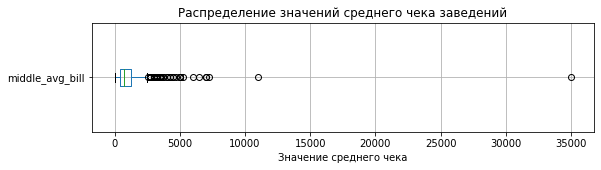

In [60]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(9, 2))

# Строим диаграмму размаха значений в столбце middle_avg_bill' 
filtered_seats.boxplot(column= 'middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений среднего чека заведений')
plt.xlabel('Значение среднего чека')

plt.show()

Распределение данных ассиметричное, сильно скошено влево. Можно заметить сильный выброс в правой части диаграммы - 35000, данное значение может быть аномальным, также есть высокие значения, которые можно отнести к выбросам. Однако сами значения не выглядят ошибкой, такой средний чек в некоторых заведениях вполне допустим. Поэтому при анализе данных их оставим.

Выведем строки со значением 35000 в столбце `middle_avg_bill`.

In [61]:
# Выведем строки со значением 35000
df.loc[df['middle_avg_bill'] == 35000]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
7177,07b4e95afe8b4d299f823dc4f9de6df5,кафе,ресторан,"москва, каширское шоссе, 23, стр. 2",Южный административный округ,"ежедневно, круглосуточно",4.1,0,100.0,высокие,Средний счёт:20000–50000 ₽,35000.0,NaN,True


В данном случае выброс не является ошибкой, медиана указанного диапазона в столбце `avg_bill` действительно равна 35000.

Визуализируем распределение цены среднего чека в зависимости от района Москвы. Для более корректного анализа и лучшей наглядности отфильтруем данные с минимальным значением 0 и максимальным значением - 35000, они встречается в данных всего один раз.

In [62]:
# Фильтруем пропущенные и максимальное значение в столбеце middle_avg_bill
df_avg_bill = df[(df['middle_avg_bill'] <35000) & ((df['middle_avg_bill'] >0))]

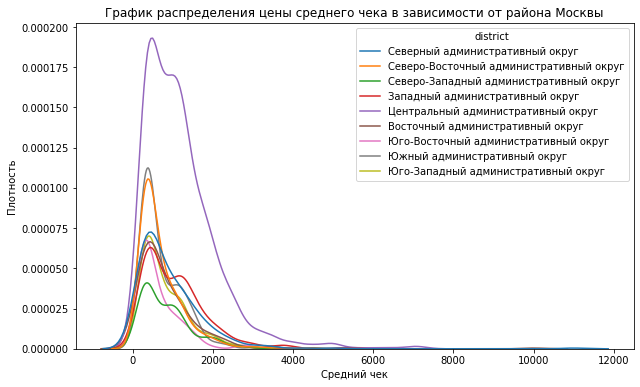

In [63]:
#Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим линии kde для каждого района
sns.kdeplot(data= df_avg_bill, x='middle_avg_bill', hue='district') 

# Настраиваем внешний вид графика и выводим его на экран
plt.title('График распределения цены среднего чека в зависимости от района Москвы')
plt.xlabel('Средний чек')
plt.ylabel('Плотность')
plt.show()

По графику видно, что линия KDE для распределени цены среднего чека в центральном районе выше по значению плотности по сравнению с линиями других районов, а также она охватывает больший диапазон значения средней цены без выбросов, чем остальные.  Это может говорить о более широком разбросе значений.

Для более детального анализа, рассчитаем среднее и медианное значения цены среднего чека для каждого района.

In [64]:
# Рассчитаем среднее и медианное значение цены среднего чека
df_avg_bill.groupby('district').agg({'middle_avg_bill':['mean','median','min', 'max']})

middle_avg_bill                 \
                                                   mean  median    min   
district                                                                 
Восточный административный округ             820.626953   575.0   50.0   
Западный административный округ             1053.225464  1000.0   50.0   
Северный административный округ              927.959656   650.0  130.0   
Северо-Восточный административный округ      716.611267   500.0   50.0   
Северо-Западный административный округ       822.222900   700.0  120.0   
Центральный административный округ          1192.182251  1000.0   67.0   
Юго-Восточный административный округ         654.097961   450.0   30.0   
Юго-Западный административный округ          792.561707   600.0  100.0   
Южный административный округ                 725.242798   500.0  100.0   

                                                  
                                             max  
district                                          
Восточный административный округ         10000.0  
Западный административный округ           5250.0  
Северный административный округ          11000.0  
Северо-Восточный административный округ   4500.0  
Северо-Западный административный округ    2900.0  
Центральный административный округ        7250.0  
Юго-Восточный административный округ      3750.0  
Юго-Западный административный округ       2750.0  
Южный административный округ              3500.0

Найдем типичное значение среднего чека для каждого административного округа.

In [65]:
# Группируем данные по столбцу 'district' и считаем типичное значение среднего чека
df_avg_bill.groupby('district')['middle_avg_bill'].agg(pd.Series.mode).to_frame().sort_values(by='middle_avg_bill', 
                                                    ascending=False)

,middle_avg_bill
district,
Восточный административный округ,1250.0
Западный административный округ,1250.0
Северо-Западный административный округ,1250.0
Центральный административный округ,1250.0
Юго-Западный административный округ,1250.0
Южный административный округ,1250.0
Северный административный округ,500.0
Северо-Восточный административный округ,300.0
Юго-Восточный административный округ,300.0


По всем районам Москвы мадиана значительно ниже среднего значения цены, что говорит о том, что в каждом наборе данных присутствуют выбросы. Однако в этом случае это не ошибка, т.к. высокие цены характерны для небольшого сегмента в сфере общепита, что и приводит к единичным случаям высокой цены среднего чека. Также можно выделить, что наиболее нормальное распределение цены наблюдается в Западном административном округе - среднее значение 1053 и медиана 1000.

По уровню значения средней цены лидирует ЦАО - 1192, и здесь также можно выделить западный район - 1053, и также можно отметить, что медиана в данных районах самая высокая - 1000. Наиболее низкий уровень цены наблюдается в Юго-Восточном административном округе (среднее значения 654, медиана 450). 

В целом, можно сделать вывод что удаленность от центра значительно снижает цены на средний чек в заведениях Москвы. Также, высокий уровень цены наблюдается в ЗАО Москвы, это можно объяснить тем, что западный район считается одним из дорогих районов Москвы, где, как правило, находятся дорогие заведения общепита. 

Отдельно изучим и рассмотрим на графике распределение цены среднего чека в центральном районе Москвы.

In [66]:
# Фильтруем данные по столбцам 'district' и 'middle_avg_bill'  
df_centre = df[(df['district'] =='Центральный административный округ') & ((df['middle_avg_bill'] >0))]

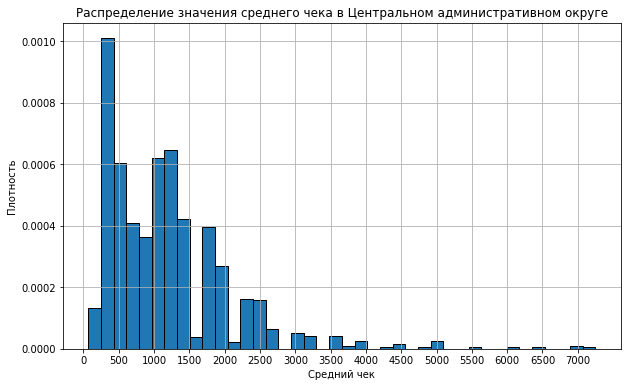

In [67]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму через plot(kind='hist')
df_centre['middle_avg_bill'].plot(kind='hist',bins=40, edgecolor='black', density = True) 

# Настраиваем оформление графика
plt.title('Распределение значения среднего чека в Центральном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Плотность')
plt.xticks(np.arange(0,7500,500))
plt.grid()
plt.show()

Видно, что значения среднего чека в ЦАО Москвы действительно имеют достаточно широкий разброс. Мода, т.е. наиболее типичная стоимость среднего чека равна - 1250. Половина значений стоимости сосредоточены в диапазоне от 200 до 1000. Наблюдаются частые выбросы в большую сторону в диапазоне от 3000 до 7250. Это может говорить о наличием более узкого сегмента дорогих заведений общепита.     

---

### Промежуточный вывод

**Исследовательский анализ данных рынка общественного питания города Москвы показал следующее**:
 - Наиболее популярными категориями среди заведений общепита в Москве являются кафе, ресторан и кофейня. Максимальное количество заведений сосредоточено в центральном административном округе и здесь также можно отметить популярность вышеуказанных категорий с тем отличием, что рестораны по количеству превышают кафе.
 - На рынке общепита преобладают несетевые заведения - 62%. Можно отметить, что к несетевым чаще всего отосятся такие категории как рестораны кафе и бары, а к сетевым: кофейня, булочная, пиццерия. 
 - В целом по Москве наиболее распространены заведения с количество посадочных мест 40, однако в редких случаях это значение может быть достоточно высоким - 350 и более. По видам общепита типичное число посадочных мест следующее:
   - ресторан и кофейня - 100 мест;
   - кафе, пиццерия, быстрое питание и столовая - 40 мест;
   - бар-паб - 60 мест;
   - булочная - 50 мест.
 - Средний рейтинг в разрезе категорий заведений варьируется от 4.05 `быстрое питание` до 4.39 `бар-паб`. 
 - Выявлена зависимость между рейтингом и ценовой категорией общепита - максимальный усредненный рейтинг замечается у заведений с высокой ценовой категорией - 4.44, далее по мере снижения цены наблюдается небольшое падение рейтинга до 4.17.
 - Среди сетевых заведений наиболее популярными являются кофейни и в этой категории лидирует `шоколадница` - 120 заведений. Также можно отметить большое количество пиццерий - `домино'с пицца` и `додо пицца` - 76 и 74 заведений. По значению среднего рейтинга сетей лидирует булочная "буханка" - 4.4 и кафе "кулинарная лавка братьев караваевых" - 4.39.
 - Удаленность от центра значительно снижает стоимость среднего чека в общепитах Москвы, однако в ЗАО уровень цены приближается к центральным, медиана в данных районах самая высокая - 1000. Это можно объяснить тем, что западный район является одним из самых дорогих районов города. Во всех административных округах присутствуют выбросы значения среднего чека в большую сторону - от 3000 до 35000, в этом случае не будем считать это ошибкой, т.к. высокие цены характерны для небольшого сегмента в сфере общепита, что и приводит к единичным случаям завышенной стоимости среднего чека.

## 4. Итоговый вывод и рекомендации

В процессе изучения рынка общественного питания Москвы, был проведен анализ данных 8402 заведений города. Данные состояли из общей информации о заведениях общепита и их ценовой категории. Основной задачей исследования являлось детально изучить данные в разрезе категорий общественного питания и выявить подходящее место для открытия заведения.

**Популярный тип заведений Москвы**

Исследовательский анализ данных позволил выявить топ популярных категорий общепита в Москве - кафе (2376), ресторан (2042) и кофейня (1413). Среди сетевых общепитов самую большую позицию занимают кофейни - 720 объектов, и в их числе самой популярной является "Шоколадница" - 120 заведений. Для данных видов заведений наиболее типичное количество посадочных мест следующее: 40 для кафе и 100 для ресторана и кофейни. Также можно отметить, что в целом, наблюдается определенная зависимость рейтинга заведений с их ценовой категорией - у общепитов с более высоким уровнем цен, оценка выше: рейтинг заведений с высокой ценовой категорией - 4.44 и по мере снижения цены наблюдается небольшое падение до 4.17. 

**Подходящее место для открытия заведения в Москве**

Самым популярным районом по количеству заведений является центральный административный округ - 2242 общепита. Это логично, ведь центр столицы является средоточием общественной и деловой жизни, здесь находится наибольшее количество торговых центров - мест массового скопления людей и это делает их наиболее привлекательными для открытия общепита. Количество заведений в остальных административных округах варьируется от 409 до 898 объектов. По значению среднего чека также выделяется ЦАО - медиана значения среднего чека равна 1000, и также здесь можно отметить западный район, уровень цены практически совпадает с центральным. Это можно объяснить тем, что данный район города является одним из самых дорогих. 

**Рекомендации**

В качестве рекомендаций по выбору категории заведения стоит обратить внимание на несетевой тип общепита и остановиться например на кафе - они занимают первую строчку по количеству заведений в городе 2376, и среди них преобладают несетевые 1597 объектов. Из этого следует, что кафе является достаточно востребованным типом заведения. Также есть возможность создать уникальную концепцию, что положительно повлияет на конкуренцию, в отличии от кофеин, которые тоже популярны - 1413 объекта, но в этой категории более востребованы сети (720 объекта), и будет достаточно рискованно выходить на рынок против существующих больших сетей, таких как "Шоколадница" - 120 заведений.

При выборе оптимального места для открытия общепита, можно рекомендовать западный административный округ, т. к. исследование показало, что средний чек в этом районе приближен к центральному: в обоих районах наблюдается максимальное значение медианы среднего чека (1000), а также усредненное значение стоимости (1053 - в западном районе и 1192 в центральном районе). В то же время можно предположить, что стоимость арендной платы за помещение здесь должна быть гораздо ниже и уровень конкуренции значительно меньше, чем в центре.